In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("Hitters.csv")

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
df.dropna(inplace=True)

In [5]:
df = df._get_numeric_data()

In [6]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [7]:
df = StandardScaler().fit_transform(df)

In [8]:
df[0:5, 0:5]

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497,  0.79405962],
       [ 0.62816682,  0.73648988,  0.95878753,  0.40228577,  1.02631654],
       [-0.56209164, -0.46245892, -0.18531919, -0.61767348, -0.36722498],
       [ 1.29471156,  1.35816704, -0.87178322,  0.75534858, -0.0188396 ]])

In [9]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)

In [10]:
component_df = pd.DataFrame(data=pca_fit, columns=["first_component", "second_component"])

In [11]:
component_df.head()

,first_component,second_component
0,0.076848,1.653525
1,0.337127,-2.320560
2,3.408362,0.755757
3,-2.642221,-0.361486
4,1.071681,-1.511674


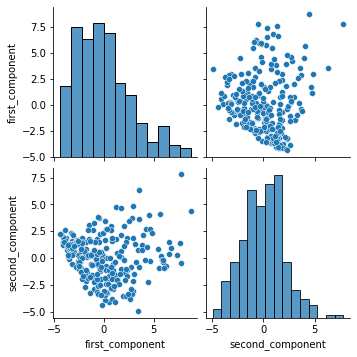

In [12]:
sns.pairplot(component_df)

In [13]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801])

In [14]:
# So the first value here says that the first component represents the features that it's supposed to represent with an accuracy of 45%.
# The second value says that the second component represents the features that it's supposed to represent with an accuracy of 24%. 
# So these two components together represent nearly 70% of our data.

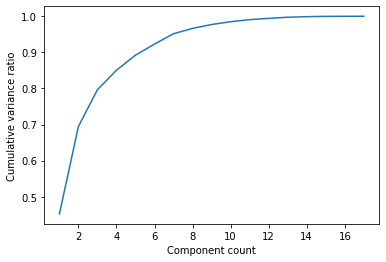

In [15]:
pca = PCA().fit(df)
x = range(1,18)  # We're adding this line of code so that our graph starts from 1. Otherwise it'd start from 0 which may be confusing.
plt.plot(x, np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Component count")
plt.ylabel("Cumulative variance ratio")
plt.show()

In [16]:
pca.explained_variance_ratio_

array([4.52454661e-01, 2.42468012e-01, 1.01696801e-01, 5.39343967e-02,
       4.16143455e-02, 3.08119274e-02, 2.86933912e-02, 1.47589096e-02,
       1.06379741e-02, 7.78968542e-03, 5.72654636e-03, 3.49183444e-03,
       3.16734133e-03, 1.57268674e-03, 8.27965421e-04, 2.82821576e-04,
       7.06999352e-05])

In [17]:
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df)

In [18]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801, 0.1016968 ])